In [29]:
#changing the working directory
%cd /content/gdrive/MyDrive/Skin Disease

/content/gdrive/MyDrive/Skin Disease


In [30]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [31]:
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from keras import layers
from keras import Model

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import rmsprop_v2
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten



In [32]:
 # The paths for the training and validation images
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

In [33]:
# Declare a few useful values
num_train_samples = 9013
num_val_samples = 1002
train_batch_size = 10
val_batch_size = 10
image_size = 224

In [34]:
# Declare how many steps are needed in an iteration
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [35]:
akiec_train_dir = os.path.join(train_path,'akiec')
bcc_train_dir = os.path.join(train_path,'bcc')
bkl_train_dir = os.path.join(train_path,'bkl')
df_train_dir = os.path.join(train_path,'df')
mel_train_dir = os.path.join(train_path,'mel')
nv_train_dir = os.path.join(train_path,'nv')
vasc_train_dir = os.path.join(train_path,'vasc')

In [36]:
akiec_valid_dir = os.path.join(valid_path,'akiec')
bcc_valid_dir = os.path.join(valid_path,'bcc')
bkl_valid_dir = os.path.join(valid_path,'bkl')
df_valid_dir = os.path.join(valid_path,'df')
mel_valid_dir = os.path.join(valid_path,'mel')
nv_valid_dir = os.path.join(valid_path,'nv')
vasc_valid_dir = os.path.join(valid_path,'vasc')

In [37]:
# num_akiec_train_dir = len(os.listdir(akiec_train_dir))
# num_bcc_train_dir = len(os.listdir(bcc_train_dir))
# num_bkl_train_dir = len(os.listdir(bkl_train_dir))
# num_df_train_dir = len(os.listdir(df_train_dir))
# num_mel_train_dir = len(os.listdir(mel_train_dir))
# num_nv_train_dir = len(os.listdir(nv_train_dir))
# num_vasc_train_dir = len(os.listdir(vasc_train_dir))


# print(num_akiec_train_dir)
# print(num_bcc_train_dir)
# print(num_bkl_train_dir)
# print(num_df_train_dir)
# print(num_mel_train_dir)
# print(num_nv_train_dir)
# print(num_vasc_train_dir)

In [38]:
# num_akiec_valid_dir = len(os.listdir(akiec_valid_dir))
# num_bcc_valid_dir = len(os.listdir(bcc_valid_dir))
# num_bkl_valid_dir = len(os.listdir(bkl_valid_dir))
# num_df_valid_dir = len(os.listdir(df_valid_dir))
# num_mel_valid_dir = len(os.listdir(mel_valid_dir))
# num_nv_valid_dir = len(os.listdir(nv_valid_dir))
# num_vasc_valid_dir = len(os.listdir(vasc_valid_dir))


# print(num_akiec_valid_dir)
# print(num_bcc_valid_dir)
# print(num_bkl_valid_dir)
# print(num_df_valid_dir)
# print(num_mel_valid_dir)
# print(num_nv_valid_dir)
# print(num_vasc_valid_dir)

## **Train Test and Validation**

In [39]:
from numpy import False_
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           width_shift_range=.15,
                                           height_shift_range=.15,
                                           zoom_range=0.5,
                                           horizontal_flip=True,
                                           vertical_flip=False_)

print(train_image_generator)

In [40]:
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [41]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=10,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(224,224),
                                                           class_mode='categorical',
                                                           color_mode='rgb'
                                                           )

Found 38704 images belonging to 7 classes.


In [42]:
valid_data_gen = train_image_generator.flow_from_directory(batch_size=10,
                                                           directory=valid_path,
                                                           target_size=(224,224),
                                                           class_mode='categorical',
                                                           color_mode='rgb'
                                                           )


Found 1002 images belonging to 7 classes.


In [43]:
def classLabel(source=None):
  datagen = ImageDataGenerator(rescale=1./255)
  data_generator = datagen.flow_from_directory(source)
  class_directory = data_generator.class_indices

  return data_generator, class_directory

labels = classLabel(train_path)

print(labels)

Found 38704 images belonging to 7 classes.
(<keras.preprocessing.image.DirectoryIterator object at 0x7fbb4bb0ce50>, {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6})


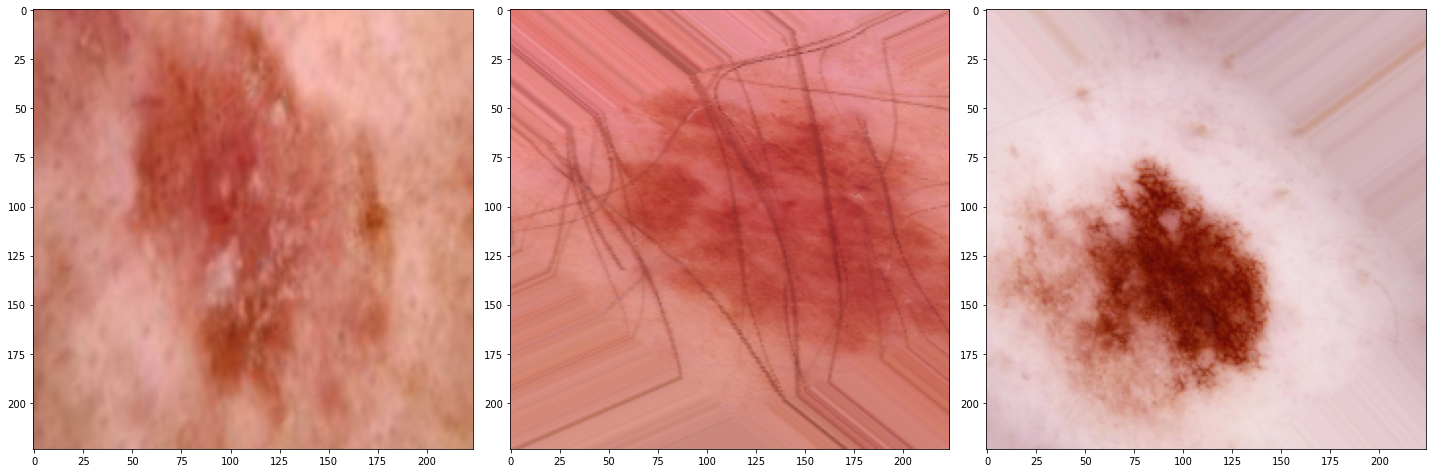

In [44]:
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
  fig, axes = plt.subplots(1,3,figsize=(20,20))
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(sample_training_images[:3])

# **Model Training**

In [45]:
from keras.layers.pooling import MaxPooling2D
model = Sequential()
model.add(Conv2D(16,3, padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv2D(32,3, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32,3, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(7,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [46]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        9

In [ ]:
history = model.fit_generator(train_data_gen,
                              validation_data=valid_data_gen,
                              steps_per_epoch=train_steps,
                              epochs=30,
                              validation_steps=val_steps,
                              verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
